In [ ]:
%matplotlib inline

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_distribution
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.primitives import StatevectorSampler

import matplotlib.pyplot as plt

In [2]:
# Función para crear y medir cada estado de Bell dado.
def create_bell_state(state_label):

    qubits = QuantumRegister(2, name='qubit') 
    medida = ClassicalRegister(2, name='medida')

    circuit = QuantumCircuit(qubits, medida)  # Dos qubits, dos bits clásicos
    circuit.h(0)  # Aplica la compuerta de Hadamard al primer qubit
    circuit.cx(0, 1)  # Aplica la compuerta CNOT con el qubit 0 como control, y el qubit 1 como objetivo.
    
    if state_label == 'Phi^-':
        circuit.z(0)  # Aplica la compuerta Z al primer qubit
    elif state_label == 'Psi^+':
        circuit.x(1)  # Aplica la compuerta X al segundo qubit
    elif state_label == 'Psi^-':
        circuit.x(1)  # Aplica la compuerta X al segundo qubit
        circuit.z(0)  # Aplica la compuerta Z al primer qubit
    
    # Medición de los qubits
    circuit.barrier()
    circuit.measure(qubits, medida)
    
    return circuit

In [3]:
# Definición de los cuatro estados de Bell
bell_states = {'Phi^+': create_bell_state('Phi^+'),
               'Phi^-': create_bell_state('Phi^-'),
               'Psi^+': create_bell_state('Psi^+'),
               'Psi^-': create_bell_state('Psi^-')}

In [ ]:
pm = generate_preset_pass_manager(optimization_level=1)
sampler = StatevectorSampler()
shots = 50000

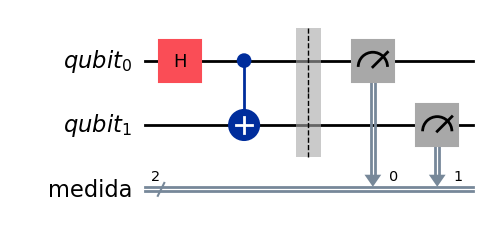

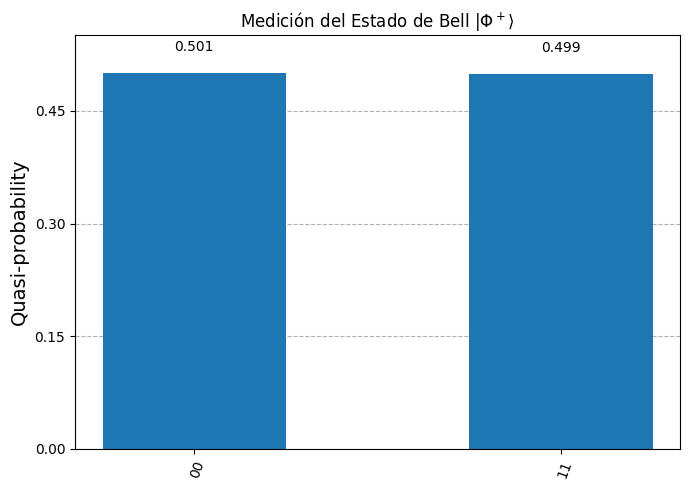

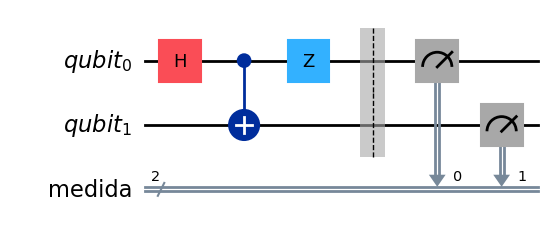

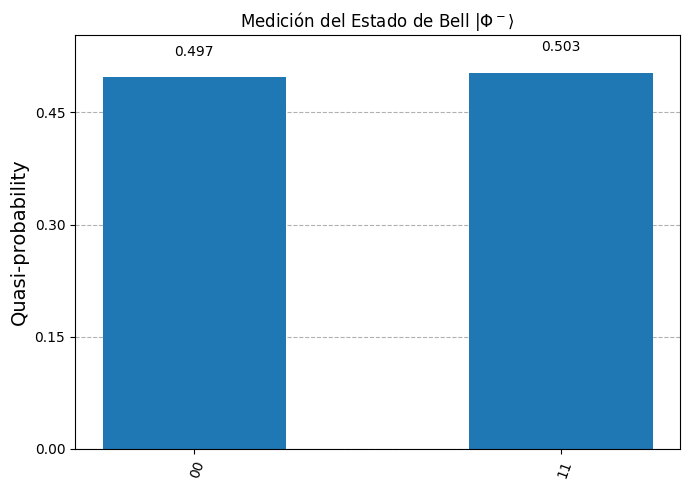

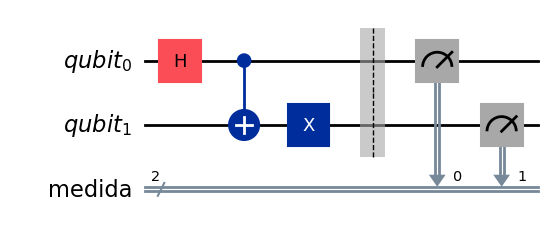

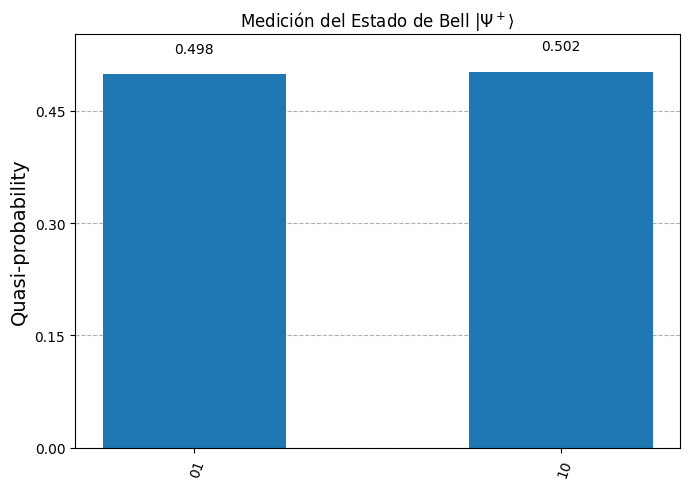

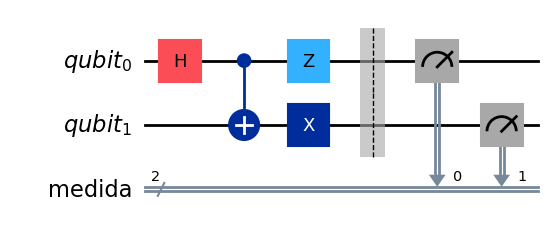

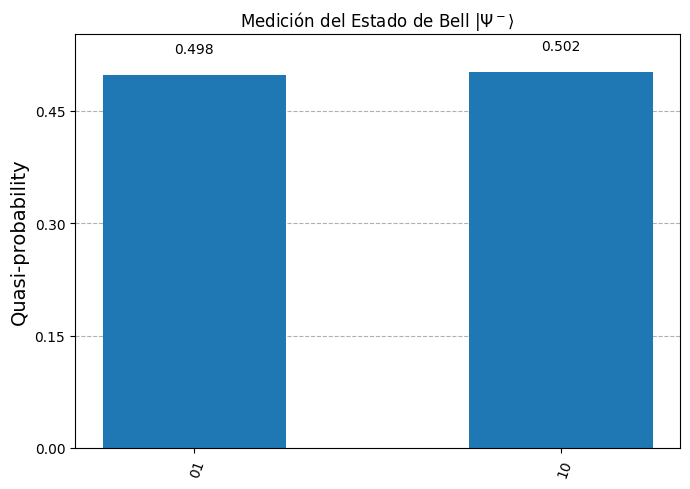

In [ ]:
# Ejecución y despliegue de los resultados obtenidos para cada estado de Bell
results = {}
for label, circuit in bell_states.items():
    isa_circuit = pm.run(circuit)
    job = sampler.run([isa_circuit], shots=shots)  # Ejecución de un circuito con Sampler
    pub_result = job.result()[0]

    data_pub = pub_result.data  # Acceso a los datos del resultado para PUB 0
    counts = data_pub.medida.get_counts()  # Conteo de medidas almacenadas en el registro clásico "medida"
    results[label] = counts

    circuit.draw("mpl", style="iqp")
    plt.show()
    plot_distribution(counts, title=f'Medición del Estado de Bell $|\\{label}\\rangle$')
    plt.show()

In [6]:
from qiskit import __version__ as qiskit_version
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 2.0.0
Python Version: 3.13.2
2025 ©
